Zaimportujmy niezbędne pliki

In [133]:
from matplotlib import pyplot as plt
from matplotlib import rc, colors
import numpy as np

Funkcja rysująca: na podstawie szablonu

In [134]:
def plot_color_gradients(gradients, names):
    rc('text', usetex=True) 
    rc('legend', fontsize=10)

    column_width_pt = 400
    pt_per_inch = 72
    size = column_width_pt / pt_per_inch

    fig, axes = plt.subplots(nrows=len(gradients), sharex=True, figsize=(size, 0.75 * size))
    fig.subplots_adjust(top=1.00, bottom=0.05, left=0.25, right=0.95)


    for ax, gradient, name in zip(axes, gradients, names):
        img = np.zeros((2, 1024, 3))
        for i, v in enumerate(np.linspace(0, 1, 1024)):
            img[:, i] = gradient(v)

        im = ax.imshow(img, aspect='auto')
        im.set_extent([0, 1, 0, 1])
        ax.yaxis.set_visible(False)

        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.25
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='left', fontsize=10)

Zadanie 1: funkcje gradientów:

Wykład był niedostępny (usunięty ze strony) w czasie kiedy robiłem to zadanie, więc hsv2rgb zrobiłem na podstawie: https://cs.stackexchange.com/questions/64549/convert-hsv-to-rgb-colors

In [135]:
def hsv2rgb(h, s, v):
    c = v*s
    hp = h%360
    hp = hp/60.0
    x = c*(1-np.abs((hp%2) - 1))
    m = v-c
    if hp < 1:
        return (c+m, x+m, m)
    if hp < 2:
        return (x+m, c+m, m)
    if hp < 3:
        return (m, c+m, x+m)
    if hp < 4:
        return (m, x+m, c+m)
    if hp < 5:
        return (x+m, m, c+m)
    return (c+m, m, x+m)
    

def gradient_rgb_bw(v):
    return (v, v, v)


def gradient_rgb_gbr(v):
    if v<0.5:
        return (0, 1-(2*v), 2*v)
    else:
        return (2*(v-0.5), 0, 1-(2*(v-0.5)))

def gradient_rgb_gbr_full(v):
    if v<0.25:
        return (0, 1, 4*v)
    if v<0.5:
        return (0, 1-(4*(v-0.25)), 1)
    if v<0.75:
        return (4*(v-0.5), 0, 1)
    else:
        return (1, 0, 1-(4*(v-0.75)))


def gradient_rgb_wb_custom(v):
    if v<1/7:
        return (1,1-(v*7),1)
    if v<2/7:
        return (1-((v-1/7)*7),0,1)
    if v<3/7:
        return (0,(v-2/7)*7,1)
    if v<4/7:
        return (0,1,1-((v-3/7)*7))
    if v<5/7:
        return ((v-4/7)*7,1,0)
    if v<6/7:
        return (1,1-((v-5/7)*7),0)
    return (max(0,1-((v-6/7)*7)),0,0)


def gradient_hsv_bw(v):
    return hsv2rgb(0.0, 0.0, v)


def gradient_hsv_gbr(v):
    return hsv2rgb(v*240 + 120, 1.0, 1.0)

def gradient_hsv_unknown(v):
    return hsv2rgb(v*(-120) + 120, 0.5, 1.0)


def gradient_hsv_custom(v):
    return hsv2rgb(np.exp(v)*180, np.sin(v*np.pi), 1)

Wyświetl gradienty: z szablonu

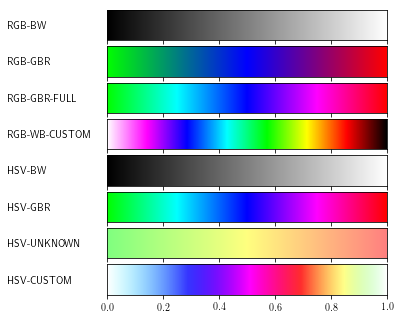

In [136]:
def toname(g):
    return g.__name__.replace('gradient_', '').replace('_', '-').upper()
gradients = (gradient_rgb_bw, gradient_rgb_gbr, gradient_rgb_gbr_full, gradient_rgb_wb_custom,
             gradient_hsv_bw, gradient_hsv_gbr, gradient_hsv_unknown, gradient_hsv_custom)

plot_color_gradients(gradients, [toname(g) for g in gradients])

Zadanie 1 zrobione, bierzemy się za drugie

Najpierw pobierz i  wczytaj do tablicy tablic plik .dem. Odczytaj wartości w pierwszej linii, reszte przekształć w macierz. Znormalizuj macierz

In [137]:
mat = np.genfromtxt('http://www.cs.put.poznan.pl/wjaskowski/pub/teaching/kck/kolorowanie_mapy/big.dem', delimiter=' ', skip_header=1)
minval = np.min(np.min(mat))
maxval = np.max(np.max(mat))
mat = (mat - minval)/maxval

Zdefiniuj funkcję rysującą mapę i ją uruchom

Wybrałem słońce świecące "z lewej strony". Nie zabrałem się za wektory - użyłem mapy wysokości do cieniowania.

In [138]:
def gradient_hsv_hipso(v, d):
    return hsv2rgb(v*(-180) + 120, 1.0, min(1,d+0.2))

def plot_map(data):
    img = np.zeros((500, 500, 3))

    #cieniowanie na bazie macierzy różnic
    diff = np.zeros((500, 499))
    for i in range(500):
        for j in range(499):
            diff[i, j] = np.max(data[i,j+1] - data[i,j], 0)
    mindiff = np.min(np.min(diff))
    maxdiff = np.max(np.max(diff))
    diff = (diff - mindiff)/maxdiff
    
    for i in range(500):
        for j in range(500):
            if j==499:
                img[i,j,:] = gradient_hsv_hipso(data[i,j], 0)
            else:
                img[i,j,:] = gradient_hsv_hipso(data[i,j], diff[i,j])

    im = plt.imshow(img)
    im.set_extent([0, 1, 0, 1])

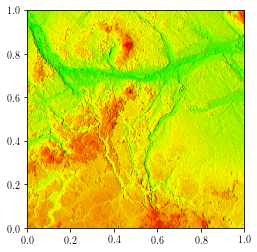

In [139]:
plot_map(mat)